<a href="https://colab.research.google.com/github/masterTAMAL/Daily_Task/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
# data collection and processor
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [89]:
df.head()
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [90]:
df.shape

(4340, 8)

In [91]:
#getting some information above datashet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [92]:
#missing vale
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [93]:
# checking the distrubuion of categorigal data
print(df.fuel.value_counts())

print(df.seller_type.value_counts())

print(df.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [94]:
df.drop(['owner'],axis=1,inplace=True)

In [95]:
#encoding fuel colum
df.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4.0},inplace=True)
df.replace({'Dealer':0,'Individual':1,'Trustmark Dealer':2},inplace=True)
df.replace({'Manual':0,'Automatic':1},inplace=True)

<ipython-input-95-ae59dadbdaa0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4.0},inplace=True)
<ipython-input-95-ae59dadbdaa0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Dealer':0,'Individual':1,'Trustmark Dealer':2},inplace=True)
<ipython-input-95-ae59dadbdaa0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. T

In [96]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission
0,Maruti 800 AC,2007,60000,70000,0.0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1.0,1,0
3,Datsun RediGO T Option,2017,250000,46000,0.0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1.0,1,0


Spltting into test data and training data


In [97]:
X=df.drop(['name','selling_price'],axis=1)
Y=df['selling_price']

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model training

In [115]:
model=LinearRegression()

In [116]:
model.fit(X_train,Y_train)

LinearRegression()

In [117]:
training_data_prediction=model.predict(X_train)

In [118]:
error=mean_squared_error(Y_train,training_data_prediction)
print(error)

191539877503.46295


In [119]:
error=r2_score(Y_train,training_data_prediction)
print(error)

0.42707003860717474


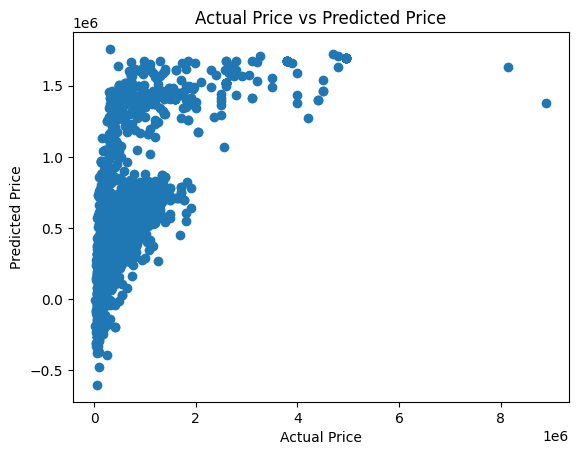

In [120]:
#visualize the actual price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [121]:
test_data_prediction=model.predict(X_test)


In [122]:
error=mean_squared_error(Y_test,test_data_prediction)
print(error)
error=r2_score(Y_test,test_data_prediction)
print(error)

167237908385.5116
0.5035628808178241


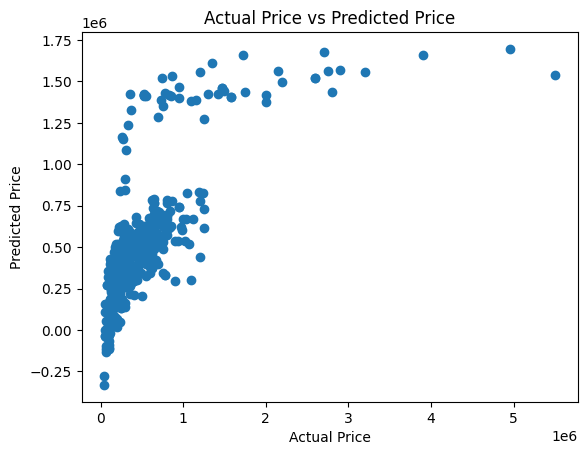

In [123]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [124]:
# lasso reression
lasso_model=Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

In [125]:
training_data_prediction=lasso_model.predict(X_train)
error=mean_squared_error(Y_train,training_data_prediction)
print(error)
error=r2_score(Y_train,training_data_prediction)
print(error)


191539877520.2837
0.4270700385568609


In [126]:
test_data_prediction=lasso_model.predict(X_test)
error=mean_squared_error(Y_test,test_data_prediction)
print(error)
error=r2_score(Y_test,test_data_prediction)
print(error)

167238112523.2686
0.5035622748454045
